<a href="https://colab.research.google.com/github/Bhamare04/Data-Science-ML-Project/blob/main/Simple_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
df=pd.read_csv('heart.csv')

In [11]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

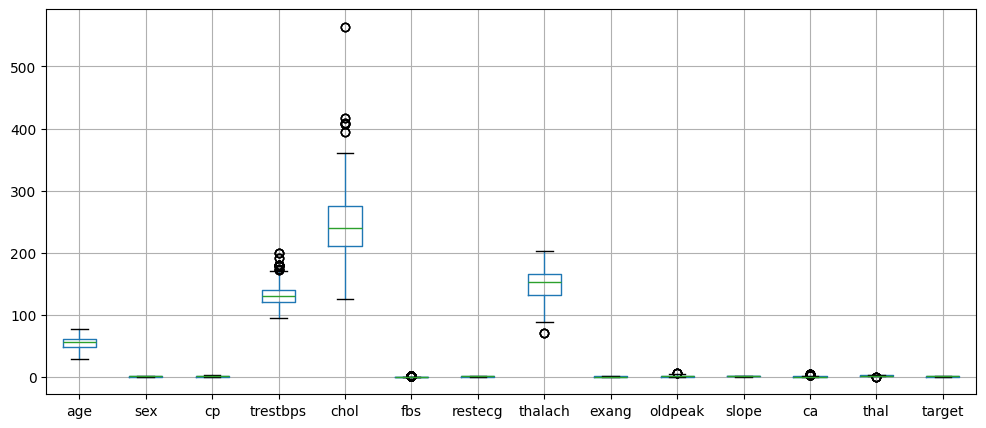

In [14]:
plt.figure(figsize=(12,5))
df.boxplot()

<Axes: ylabel='trestbps'>

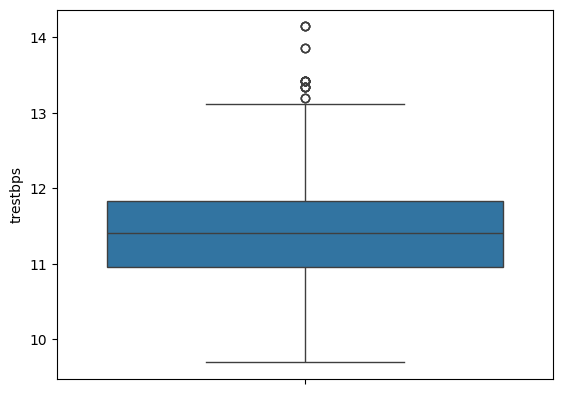

In [15]:
sns.boxplot(np.sqrt(df['trestbps']))

<Axes: ylabel='chol'>

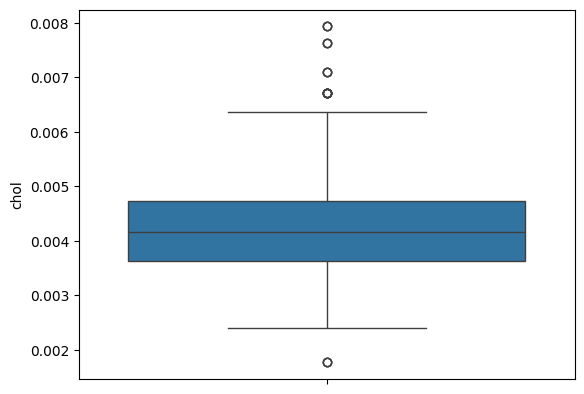

In [16]:
sns.boxplot(1/(df['chol']))

<Axes: ylabel='thalach'>

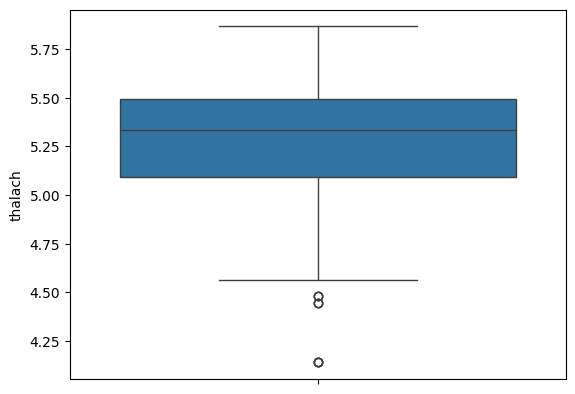

In [17]:
sns.boxplot(np.cbrt(df['thalach']))

<Axes: ylabel='oldpeak'>

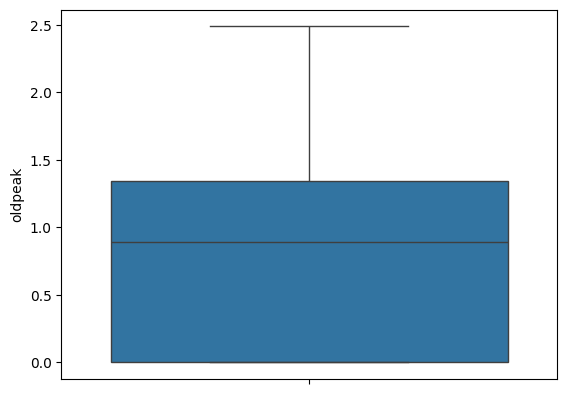

In [18]:
sns.boxplot(np.sqrt(df['oldpeak']))

In [19]:
df['oldpeak']=np.sqrt(df['oldpeak'])

<Axes: >

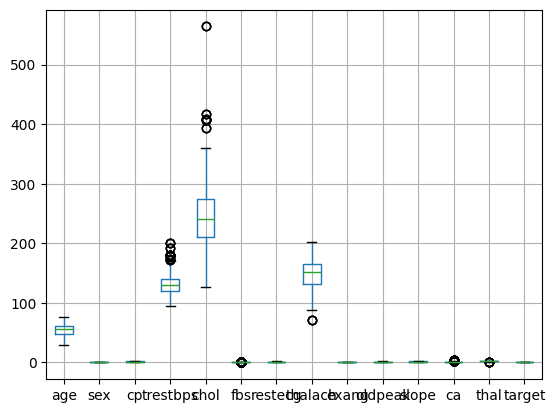

In [20]:
df.boxplot()

In [21]:
x=df.drop('target',axis=1)
y=df['target']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)

In [23]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred=dt_model.predict(x_test)
y_pred[:5]

array([0, 0, 1, 0, 1])

In [25]:
y_test[:5]

,target
800,0
150,0
34,1
736,0
299,1


In [26]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print("confusion matrix:",cnf_matrix)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

class_report=classification_report(y_test,y_pred)
print("class_report",class_report)


confusion matrix: [[100   0]
 [  0 105]]
accuracy: 1.0
class_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [27]:
y_pred_train=dt_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion matrix:",cnf_matrix)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

class_report=classification_report(y_train,y_pred_train)
print("class_report",class_report)


confusion matrix: [[399   0]
 [  0 421]]
accuracy: 1.0
class_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       421

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



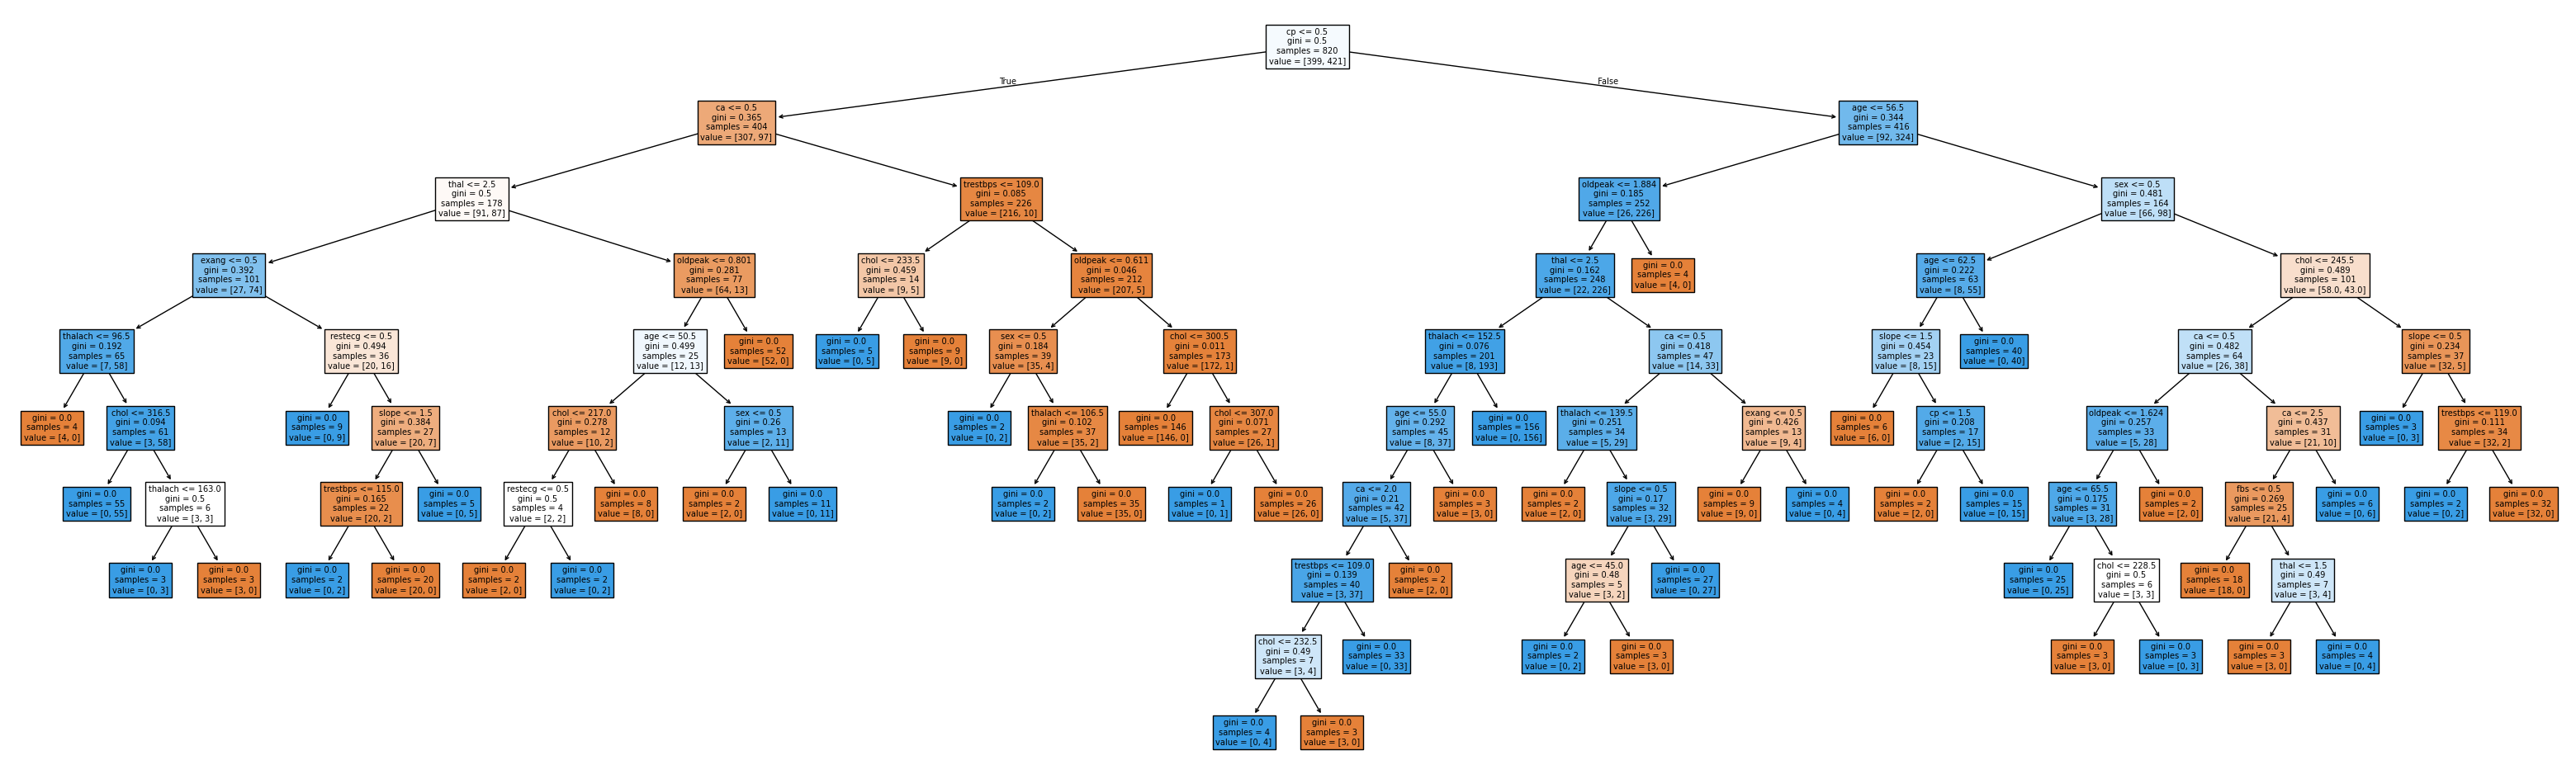

In [28]:
plt.figure(figsize=(40,12))
plot_tree(dt_model,feature_names=x.columns,filled=True)
plt.savefig('dt_model.jpg')

In [31]:
from sklearn.metrics import mean_squared_error
MAE=(y_test,y_pred)
print("confusion matrix:",MAE)

MSE=mean_squared_error(y_test,y_pred)
print("accuracy:",MSE)

class_report=classification_report(y_test,y_pred)
print("class_report",class_report)

confusion matrix: (800    0
150    0
34     1
736    0
299    1
      ..
807    1
543    0
207    1
338    0
899    1
Name: target, Length: 205, dtype: int64, array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1]))
accuracy: 0.0
class_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1      

In [32]:
import pickle

In [33]:
pickle.dump(dt_model, open('dt_model.pkl', 'wb'))